In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load the dataset from the saved .npz file
data = np.load('asl_dataset.npz')

In [3]:
# Extract the training, validation, and test datasets
train_images = data['train_images']
train_labels = data['train_labels']
val_images = data['val_images']
val_labels = data['val_labels']
test_images = data['test_images']
test_labels = data['test_labels']
class_names = data['class_names']

In [4]:
print("Dataset loaded successfully!")
print(f"Training set size: {train_images.shape}")
print(f"Validation set size: {val_images.shape}")
print(f"Test set size: {test_images.shape}")

Dataset loaded successfully!
Training set size: (8036, 32, 32, 1)
Validation set size: (1148, 32, 32, 1)
Test set size: (2297, 32, 32, 1)


In [5]:
# Convert labels to categorical (one-hot encoding)
num_classes = len(class_names)
train_labels_categorical = to_categorical(train_labels, num_classes)
val_labels_categorical = to_categorical(val_labels, num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes)

In [6]:
# Define the image size
image_size = train_images.shape[1]

In [7]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)
val_datagen = ImageDataGenerator()

In [8]:
train_generator = train_datagen.flow(train_images, train_labels_categorical, batch_size=32)
val_generator = val_datagen.flow(val_images, val_labels_categorical, batch_size=32)

In [9]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)))
model.add(MaxPooling2D((2, 2)))

c:\Users\HP\asl_detection1\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [11]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,952 (1.21 MB)

 Trainable params: 316,952 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the model
history = model.fit(train_generator, epochs=30, validation_data=val_generator)

Epoch 1/30


c:\Users\HP\asl_detection1\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


252/252 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3930 - loss: 2.0275 - val_accuracy: 0.9077 - val_loss: 0.4204
Epoch 2/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6934 - loss: 0.9419 - val_accuracy: 0.9512 - val_loss: 0.1766
Epoch 3/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7841 - loss: 0.6491 - val_accuracy: 0.9512 - val_loss: 0.1195
Epoch 4/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8347 - loss: 0.5024 - val_accuracy: 0.9791 - val_loss: 0.0893
Epoch 5/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8580 - loss: 0.4120 - val_accuracy: 0.9834 - val_loss: 0.0708
Epoch 6/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8844 - loss: 0.3523 - val_accuracy: 0.9843 - val_loss: 0.0599
Epoch 7/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8899 - loss: 0.3323 - val_accuracy: 0.9843 - val_loss: 0.0466
Epoch 8/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9013 - loss: 0.2977 - val_accuracy: 0.991

In [15]:
# Evaluate the model on the test data
loss, acc = model.evaluate(test_images, test_labels_categorical, verbose=0)
print('The accuracy of the model for test data is:', acc * 100)
print('The Loss of the model for test data is:', loss)

The accuracy of the model for test data is: 99.69525337219238
The Loss of the model for test data is: 0.009209130890667439


In [16]:
# Save the model
model.save('asl_cnn_model.h5')
print('Model saved as asl_cnn_model.h5')

Model saved as asl_cnn_model.h5


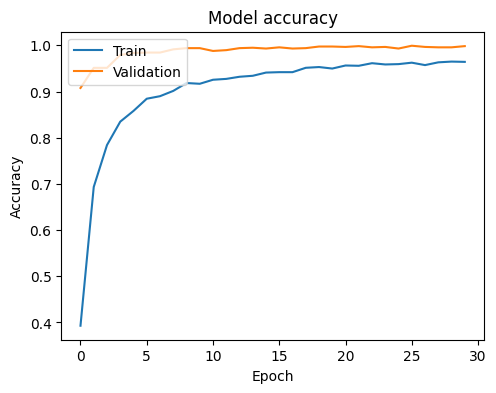

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

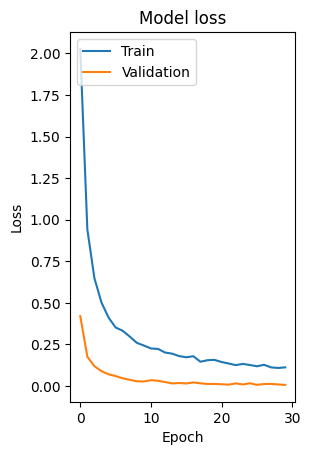

In [18]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [19]:
plt.show()